# Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

### Notebook 2 - Support Vector Machines

por [Afrânio](http://afrjr.weebly.com) - [afraeq@gmail.com](mailto:afraeq@gmail.com)

[Escola Piloto Prof. Giulio Massarani](http://www.escolapiloto.peq.coppe.ufrj.br/) - [Programa de Engenharia Química, COPPE, UFRJ](http://portal.peq.coppe.ufrj.br/) - 2019

Neste [notebook](http://jupyter.org/) é estudada a técnica de aprendizado [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine), no contexto de problemas de classificação. 

Também aqui se introduz a biblioteca [scikit-learn](http://scikit-learn.org/stable/), que contém  todos os algoritmos de *machine learning* usados no curso.

Conceitos importantes a aprender:

* uso da biblioteca scikit-learn;
* o problema de classificação;
* classificação linear *x* não-linear;
* máquinas de vetores suporte;
* funções kernel;
* ajuste de hiperparâmetros;
* subajuste *x* sobreajuste;
* detecção de anomalias.

In [1]:
# importando módulos necessários 
# (com exceção da scikit-learn, cujos métodos serão importados ao longo do texto)

import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

## 0. A biblioteca scikit-learn

* O ambiente de computação científica do Python é composto pela biblioteca principal, o [scipy](https://www.scipy.org/), e as bibliotecas auxiliares, ou [scikits](http://scikits.appspot.com/scikits), designadas para aplicações específicas. 

* O [scikit-learn](http://scikit-learn.org/stable/), utilizado neste curso, é a biblioteca padrão usada para aprendizado de máquina em Python. 

* Além dos algoritmos em si, a biblioteca conta com vários recursos práticos como pré-processamento dos dados, seleção de atributos, etc. 

## 1. Descrição da técnica e ilustração de uso

A máquina de vetores suporte (*support vector machine*, ou *SVM*) é uma técnica de aprendizado supervisionado, utilizada para tarefas de classificação ou regressão. Uma lista das vantagens e desvantagens do uso da técnica pode ser consultada na [página oficial do scikit-learn](http://scikit-learn.org/stable/modules/svm.html). A seguir, a técnica é descrita a partir de exemplos de sua aplicação em problemas de complexidade crescente.

### 1.1 Classificação linear

Sejam dois conjuntos de dados em um espaço bidimensional:

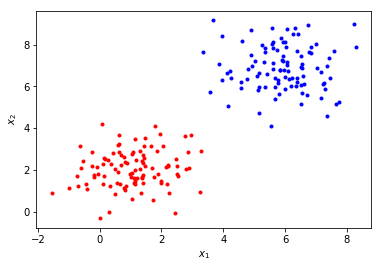

In [2]:
r = [np.random.RandomState(seed = i) for i in range(4)]

red  = np.array([r[0].randn(100) + 1, r[1].randn(100) + 2]).T
blue = np.array([r[2].randn(100) + 6, r[3].randn(100) + 7]).T

fig1, ax1 = plt.subplots()
ax1.plot(red[:,0],  red[:,1], '.r')
ax1.plot(blue[:,0], blue[:,1], '.b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

O *problema da classificação* consiste em elaborar um modelo que separe o espaço em regiões, cada qual correspondente a uma das categorias (no caso, ponto azul ou ponto vermelho). Esse modelo pode então ser usado para classificar novos pontos cuja categoria é desconhecida.

O caso acima é o mais simples possível, já que a separação pode ser feita com uma reta (diz-se que os conjuntos são *linearmente separáveis*). O problema que surge é: que reta, dentre as infinitas possíveis, escolher para efetuar a classificação? A figura abaixo ilustra algumas opções.

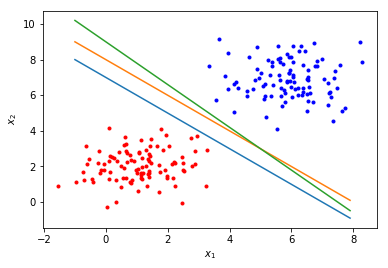

In [3]:
x = np.arange(-1,8,0.1)

ax1.plot(x,-x+7)
ax1.plot(x,-x+8)
ax1.plot(x,-1.2*x+9)

fig1

A técnica SVM nasce da ideia de que a melhor das opções é a reta que se encontra à máxima distância de ambos os conjuntos, o que intuitivamente diminuiria as chances de erro de classificação. De acordo com esse critério, a melhor das três opções no caso acima seria a laranja.

Os pontos mais próximos da reta de classificação, em cada categoria, são chamados de *vetores de suporte*. As distâncias entre esses pontos e a reta são chamadas de *margens*. 

Há dois tipos de abordagem para montar um algoritmo SVM linear: com margens *rígidas* ou *flexíveis*.

#### 1.1.1 Margens rígidas

O objetivo aqui é simplesmente maximizar as margens, ou seja, maximizar a distância entre a separação e os vetores de suporte. 

Ao se generalizar as ideias acima para um espaço $n$-dimensional, cujas coordenadas são os atributos $\mathbf{x}$ do conjunto de dados, a reta de separação torna-se um hiperplano, descrito pela equação $\mathbf{w}^T \cdot \mathbf{x} + b = 0$. O conjunto de dados de treinamento $S$ é escrito como:

$$  S = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2),...,(\mathbf{x}_n, y_n)\}$$,

sendo $\mathbf{x}_i = (x_{i1}, x_{i2}, ... , x_{im}$) um dos $n$ dados em particular, definido pelos seus $m$ atributos. O booleano $y_i \in (0,1)$ é usado como critério para classificação:

$$  y = \begin{cases}
                                   0 & \text{se $\mathbf{w}^T \cdot \mathbf{x} + b < 0$} \\
                                   1 & \text{se $\mathbf{w}^T \cdot \mathbf{x} + b \geq 0$},
  \end{cases}
  $$
  
em que é atribuído a cada uma das classes o valor 0 ou 1.

Geometricamente, pode-se mostrar que, quanto menor a inclinação  $||\mathbf{w}||$ do hiperplano, maior é o tamanho da margem. Sendo assim, o problema de classificação $SVM$ linear com margens rígidas pode ser posto como:

$$
\begin{aligned}
& \underset{\mathbf{w},b}{\text{Minimizar}}
& & \frac{1}{2}\mathbf{w}^T\cdot\mathbf{w} \\
& \text{sujeito a:}
& & t^{(i)} \left(\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b \right) \geq 1 \,\,\, \forall i = 1, ..., m,
\end{aligned}
$$

em que $t^{(i)} = -1$ para $y^{(i)} = 0$ e $t^{(i)} = +1$ para $y^{(i)} = 1$. A substituição de $||\mathbf{w}||$ por $\frac{1}{2}\mathbf{w}^T\cdot\mathbf{w}$ na função objetivo se dá para facilitar a resolução numérica. A restrição de desigualdade é a tradução matemática do conceito de margem rígida: nenhum ponto pode se encontrar além da margem!

#### 1.1.2 Margens flexíveis

Nesse caso, violações da margem são aceitas: é permitido que alguns pontos se encontrem além da margem definida pelo algoritmo (e em certos casos, até mesmo do lado errado da classificação). Isso pode ser necessário para tornar a técnica menos sensível a *outliers* e possibilitar a aplicação de sua forma linear, mesmo em dados que não sejam linearmente separáveis.

O problema de classificação SVM com margens flexíveis pode ser posto como:

$$
\begin{aligned}
& \underset{\mathbf{w},b, \zeta}{\text{Minimizar}}
& & \frac{1}{2}\mathbf{w}^T\cdot\mathbf{w} + C \sum_{i=1}^m \zeta^{(i)} \\
& \text{sujeito a:}
& & t^{(i)} \left(\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b \right) \geq 1 - \zeta^{(i)} \,\,\, \forall i = 1, ..., m,
\end{aligned}
$$

em que $\zeta^{(i)}\geq 0$ são variáveis de relaxamento, que representam o quanto à instância $i$ é permitido violar a margem. 

Agora há um balanço entre dois objetivos conflitantes: diminuir $\frac{1}{2}\mathbf{w}^T\cdot\mathbf{w}$, de modo a aumentar a margem, e diminuir $\zeta^{(i)}$, para que haja poucas violações. O hiperparâmetro $C$ possibilita que se estabeleça um compromisso entre esses dois objetivos.

#### 1.1.3 Uso no scikit-learn

Para usar um método do scikit-learn, precisamos importá-lo. 

O método de classificação SVM linear do scikit-learn é o **LinearSVC**:

In [4]:
from sklearn.svm import LinearSVC

Para usar o método, é preciso fornecer: 

* uma matriz contendo os dados nas linhas e os atributos nas colunas;

* um vetor contendo os valores $y$ (rótulos, ou *labels*) que classificam cada um dos dados. 

In [5]:
data1 = np.vstack((red,blue))
labels1 = np.hstack((np.zeros(100),np.ones(100)))

Definida a entrada, criamos um objeto **LinearSVC** chamado **clf** e rodamos a função **fit** (esse é o nome padrão para funções que realizam treinamento no scikit-learn):

In [6]:
clf = LinearSVC()
clf.fit(data1,labels1)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Parece que tudo deu certo. Perceba o valor padrão dos hiperparâmetros, em especial de $C$, que especifica a flexibilidade da margem. Na prática, para usar margens rígidas, especifica-se um valor de $C$ muito alto.

Conferindo os coeficientes encontrados:

In [7]:
print(clf.coef_)
print(clf.intercept_)

[[0.35821483 0.29946933]]
[-2.52072646]


Plotando a classificação:

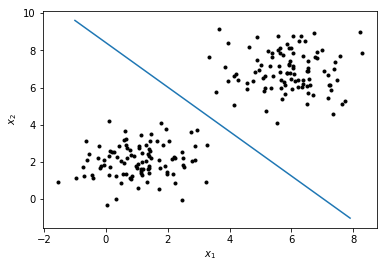

In [8]:
fig2, ax2 = plt.subplots()
ax2.plot(data1[:,0],  data1[:,1], '.k')
ax2.plot(x,(x*(-clf.coef_[0,0])-clf.intercept_[0])/clf.coef_[0,1],label =1)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$');

Avaliando o efeito do parâmetro $C$:

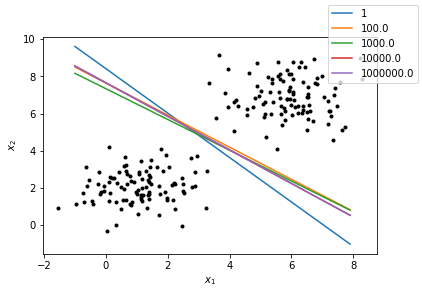

In [9]:
C = [1e2,1e3,1e4,1e6]

for c in C:
    clf = LinearSVC(C=c,random_state=0)
    clf.fit(data1,labels1)
    ax2.plot(x,(x*(-clf.coef_[0,0])-clf.intercept_[0])/clf.coef_[0,1],label=c)
    clf.fit(data1,labels1)

fig2.legend()
fig2

As retas convergem para a solução com margens rígidas, quanto maior o valor de $C$.

O parâmetro **random_state** é utilizado para determinar a semente do algoritmo, tornando assim os resultados reprodutíveis.

E se os dados forem mais embolados? Por exemplo:

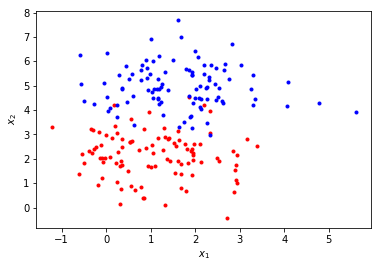

In [10]:
red2  = np.array([r[0].randn(100) + 1, r[1].randn(100) + 2]).transpose()
blue2 = np.array([r[2].randn(100) + 1.5, r[3].randn(100) + 5]).transpose()

fig3, ax3 = plt.subplots()
ax3.plot(red2[:,0],  red2[:,1], '.r')
ax3.plot(blue2[:,0], blue2[:,1], '.b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

O **LinearSVC** ainda tenta fazer o seu melhor:

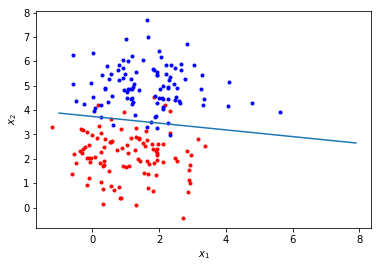

In [11]:
data2 = np.vstack((red2,blue2))

clf2 = LinearSVC(random_state=0)
clf2.fit(data2,labels1)

ax3.plot(x,(x*(-clf2.coef_[0,0])-clf2.intercept_[0])/clf2.coef_[0,1])

fig3

A depender da aplicação, o modelo linear acima poderia ser satisfatório, mesmo com os (poucos) erros de classificação que ele comete. Porém, para uma maior flexibilidade na modelagem, é preciso introduzir técnicas de classificação não-linear.

### 1.2 Classificação não-linear

A essência da classificação não-linear está no mapeamento do conjunto de treinamento $S$, do espaço de entrada para um novo espaço, denominado *espaço de características*, resultando em um novo conjunto de treinamento $\mathbf{\Phi}(S)$:

$$ \mathbf{\Phi}(S) = \{(\mathbf{\Phi}(\mathbf{x}_1),y_1),(\mathbf{\Phi}(\mathbf{x}_2),y_2),...,(\mathbf{\Phi}(\mathbf{x}_n),y_n)\}$$

Esse mapeamento é feito com a função $\mathbf{\Phi}$:

$$ \mathbf{\Phi}(\mathbf{x}_i) = (\Phi_1(\mathbf{x}_i), \Phi_2(\mathbf{x}_i),...,\Phi_M (\mathbf{x}_i))$$

A dimensão  $M$ do espaço de características pode ser muito maior do que a dimensão  $m$ do espaço de entrada. No novo espaço eventualmente ampliado, é bem possível que os dados sejam linearmente separáveis. Na verdade, o [teorema de Cover](https://en.wikipedia.org/wiki/Cover%27s_theorem) afirma que a probabilidade de que isso aconteça é bastante alta. Tudo depende da escolha apropriada da função $\mathbf{\Phi}$.

#### 1.2.1 Funções kernel

Uma função *kernel* $K$ é uma função que aceita dois pontos no espaço de entradas, $\mathbf{x}_i$ e $\mathbf{x}_j$, e fornece o produto escalar $\mathbf{\Phi}_i(\mathbf{x}_i) \mathbf{\Phi}_j(\mathbf{x}_j)$ no espaço de caractertísticas:

$$ K(\mathbf{x}_i,\mathbf{x}_j) = \mathbf{\Phi}_i(\mathbf{x}_i) \mathbf{\Phi}_j(\mathbf{x}_j) $$

As funções kernel são úteis pois:

* são em geral mais simples que as funções $\mathbf{\Phi}$ originais;
* na resolução do problema dual da minimização SVM no espaço de características, pode-se usar apenas o produto interno e abrir mão da avaliação individual das funções $\mathbf{\Phi}$, o que torna o kernel útil na utilização de espaços complicados e mesmo de dimensão infinita.

Esse último item, aliado ao fato de que os cálculos durante o treinamento são realizados apenas com os vetores de suporte e não com o conjunto inteiro de dados, tornam possível a implementação da classificação não-linear com razoável eficiência computacional.

Existem vários tipos de kernel, dentre os quais pode-se destacar:

* Linear: $K(\mathbf{a},\mathbf{b}) = \mathbf{a}^T \mathbf{b}$
* Polinomial: $K(\mathbf{a},\mathbf{b}) = (\gamma\mathbf{a}^T \mathbf{b}+r)^d$
* RBF gaussiano: $K(\mathbf{a},\mathbf{b}) = \exp(-\gamma||\mathbf{a}-\mathbf{b}||^2)$
* Sigmóide: $K(\mathbf{a},\mathbf{b}) = \tanh(\gamma\mathbf{a}^T \mathbf{b}+r)$

#### 1.2.2 Uso no scikit-learn

Os algoritmos de classificação SVM não-lineares estão na classe **SVC**:

In [12]:
from sklearn.svm import SVC

A forma de utilização é a mesma do **LinearSVC**. Uma instância da classe **SVC** é denifida, com o tipo de kernel desejado:

In [13]:
clf3 = SVC(kernel="rbf",random_state=0)
clf3.fit(data2,labels1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Para plotar o resultado do treinamento, serão utilizadas a seguinte funções, retiradas de uma [página de exemplos do scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html):

In [14]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Plotando:

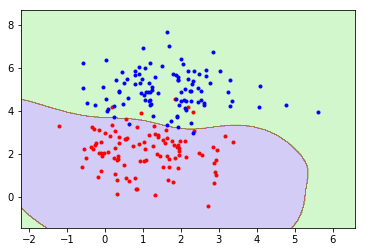

In [15]:
xx, yy = make_meshgrid(data2[:, 0], data2[:, 1])

fig4, ax4 = plt.subplots()

ax4.plot(red2[:,0],  red2[:,1], '.r')
ax4.plot(blue2[:,0], blue2[:,1], '.b')

plot_contours(ax4, clf3, xx, yy,
              cmap=plt.cm.brg, alpha=0.2);

É possível perceber que alguns erros de classificação ainda estão sendo cometidos pelo modelo. Isso está relacionado aos parâmetros $C$ (da função objetivo) e $\gamma$ (do kernel RBF): $C$ tem a ver com a rigidez da margem de classificação e $\gamma$ é inversamente proporcional ao alcance da influência de cada instância individual (quanto menor esse alcance, mais a curva tende a se aproximar de cada ponto, tornando-se mais irregular). 

A fronteira entre as duas regiões ilustra o surgimento de algumas arbitrariedades resultantes da não-linearidade do modelo. A região perto do ponto $x=-2$, por exemplo, que intuitivamente seria considerada como uma região vermelha, é classificada pelo modelo como verde! É claro, portanto, o cuidado que deve ser tomado ao se analisar alguns resultados da modelagem com algoritmos desse tipo: eles podem ser resultantes das idiossincrasias do modelo utilizado (como os efeitos de não-linearidade, no nosso caso) e não ter nada a ver com as características do conjunto de dados estudado.

$\gamma$ e $C$, em geral, são sintonizados de modo a determinar a qualidade do ajuste. Se o modelo sofre de *subajuste*, ou seja, se é muito simples para captar a essência do comportamento dos dados, é uma boa ideia aumentar $\gamma$ e $C$. Se, por outro lado, há *sobreajuste*, ou seja, o modelo é tão complexo que reproduz as especificidades do conjunto de treinamento mas não consegue fazer generalizações, é uma boa ideia diminuir $\gamma$ e $C$. A figura a seguir ilustra esses conceitos.

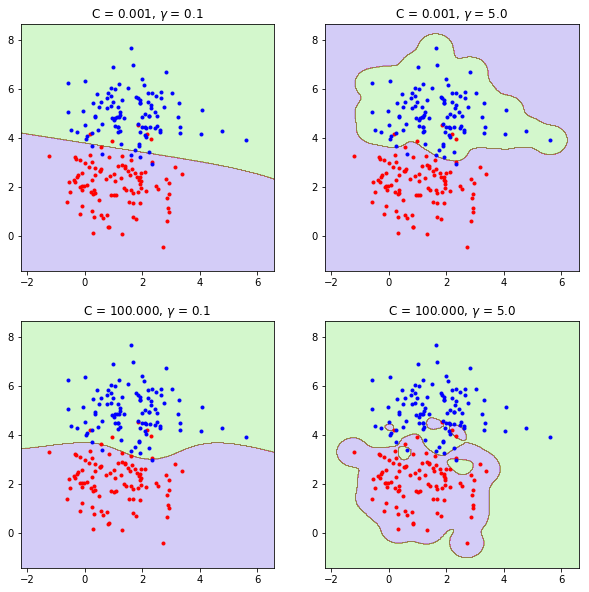

In [16]:
C = [0.001,100]
GAMMA = [0.1,5]

fig5, ax5 = plt.subplots(2,2,figsize=(10,10))

clf4 = []
i=0

for c in C:
    for gamma in GAMMA:
        clf4.append(SVC(kernel="rbf",random_state=0,C=c,gamma=gamma))
        clf4[-1].fit(data2,labels1)
        ax5.ravel()[i].plot(red2[:,0],  red2[:,1], '.r')
        ax5.ravel()[i].plot(blue2[:,0], blue2[:,1], '.b')
        X0, X1 = data2[:, 0], data2[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax5.ravel()[i], clf4[i], xx, yy, cmap=plt.cm.brg, alpha=0.2);
        ax5.ravel()[i].set_title('C = %.3f'%c+', $\gamma$ = %.1f'%gamma)
        i=i+1

Uma pergunta válida: você acha que o modelo da última figura (que mais parece uma ameba) reproduziria a essência do comportamento dos dados e, por conseguinte, seria capaz de fazer boas generalizações? 

Em outras palavras: o modelo da última figura realmente *aprendeu* o padrão desejado ou apenas *memorizou* o conjunto esse conjunto em particular?

Em última instância: essa ameba é ou não inteligente?? 

### 1.3 O conjunto de dados Iris

O [conjunto de dados Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) é um dos conjunto de dados mais famosos para aplicação em problemas de classificação, por sua simplicidade e por ser resultado de medições reais. 

Ele consiste de 50 medições de comprimentos e larguras de sépala e pétala de três espécies de Iris (Iris setosa, Iris virginica and Iris versicolor):

<img src="https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-1-4842-0958-5_8/MediaObjects/978-1-4842-0958-5_8_Fig1_HTML.jpg" width="300" height="300" />

Os dados estão disponíveis no próprio scikit-learn e podem ser importados com os comandos:

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

Imprimindo a descrição do conjunto de dados:

In [18]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Usando o pandas para visualizar o conjunto de dados:

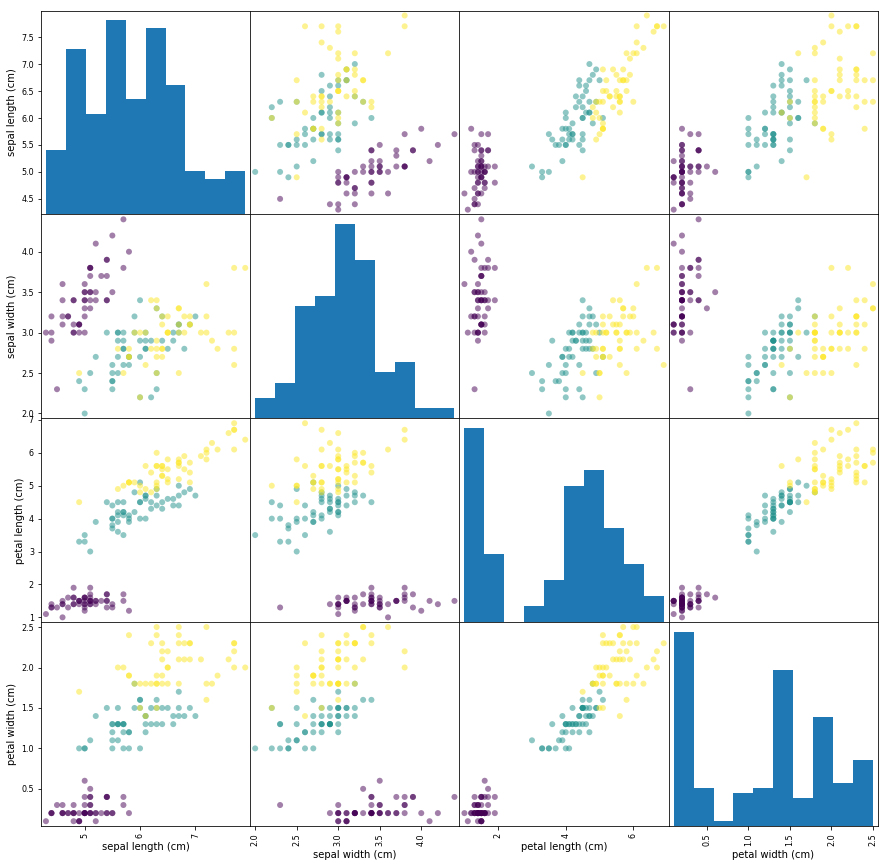

In [19]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(15, 15), marker='o');

Para aplicação em problemas de classificação, é preciso utilizar os dados em si e os rótulos. Essas propriedades podem ser obtidas com o seguintes comandos:

In [20]:
# armazenando dados de treino em X e rótulos em y

X = iris.data[:, 2:] # petal length and width
y = iris.target

Perceba que, de modo a facilitar a visualização, selecionamos para compor o conjunto de treinamento os dados referentes à pétala, que, conforme verificado no gráfico acima, são já razoavelmente separáveis.

#### *Mão na massa! *

* Neste *mão na massa* mais do que especial, pela primeira vez você irá resolver um problema de *machine learning* com um conjunto de dados real!! Construa quatro modelos SVM com as seguintes características:

    * Kernel linear, C=1;
    * Kernel RBF, Gamma = 0.7 e C=1;
    * kernel polinomial (cúbico) e C=1.

  Plote as superfícies de decisão de cada um dos modelos junto com os dados, como feito no exemplo anterior.

### 1.4 Detecção de anomalias

Na detecção de anomalias, um conjunto de dados de treinamento sem rótulos é fornecido ao algoritmo, e este cria uma fronteira que classifica eventuais novos dados como regulares (similares ao conjunto de treinamento) ou irregulares (diferentes do conjunto de treinamento). Como não é fornecido qualquer tipo de classificação a priori na etapa de treinamento, o algoritmo é classificado como não-supervisionado.

A detecção de anomalias em um conjunto de dados com a técnica de máquina de vetores de suporte no *scikit-learn* é feita com o método **OneClassSVM**, da classe **svm**:

In [21]:
from sklearn.svm import OneClassSVM

O nome **OneClassSVM** se dá porque só há uma classe de interesse na classificação: a dos dados tidos como regulares.

A seguir, um caso adaptado dos [exemplos do scikit-learn](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) é apresentado passo a passo. Nesse exemplo, dados bidimensionais de uma [distribuição normal](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal) são utilizados como conjunto de treinamento (ou seja, para novos dados serem classificados como regulares, eles devem se adequar à distribuição normal). 

Antes de mais nada, vamos definir os dados de treinamento e usá-lo para treinar uma máquina com kernel *rbf*:

In [22]:
# definindo conjunto de treinamento
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# definindo a máquina
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

# treinando a máquina
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

Criamos então dois conjuntos de teste, um com dados regulares e outro com dados irregulares (*outliers*):

In [23]:
# definindo conjunto de teste com dados regulares
X = 0.3 * np.random.randn(20, 2)
X_test_regular = np.r_[X + 2, X - 2]

# definindo conjunto de teste com outliers
X_test_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

O próximo passo é avaliar o modelo proposto pela máquina nos três conjuntos. Para isso, usamos o método **predict**:

In [24]:
# avaliando o modelo proposto pela máquina nos três conjuntos
y_pred_train = clf.predict(X_train)
y_pred_test_regular = clf.predict(X_test_regular)
y_pred_test_outliers = clf.predict(X_test_outliers)

print('Avaliações do modelo nos conjuntos de dados')

print('------------------------------------------\n Conjunto de treinamento\n------------------------------------------')
print(y_pred_train)
print('------------------------------------------\n Conjunto de teste (regular)\n------------------------------------------')
print(y_pred_test_regular)
print('------------------------------------------\n Conjunto de teste (outliers)\n------------------------------------------')
print(y_pred_test_outliers)

Avaliações do modelo nos conjuntos de dados
------------------------------------------
 Conjunto de treinamento
------------------------------------------
[ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1
  1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1 -1 -1  1]
------------------------------------------
 Conjunto de teste (regular)
------------------------------------------
[-1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

O modelo classifica os dados como regulares (valor 1) e irregulares (valor -1). Podemos calcular os erros de classificação em cada um dos três conjuntos:

In [25]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test_regular = y_pred_test_regular[y_pred_test_regular == -1].size
n_error_test_outliers = y_pred_test_outliers[y_pred_test_outliers == 1].size

error_train = n_error_train/y_pred_train.size
error_test_regular = n_error_test_regular/y_pred_test_regular.size
error_test_outliers = n_error_test_outliers/y_pred_test_outliers.size

print('------------------------------------------\n Fração de erro nas classificações \n------------------------------------------')
print('Treinamento:',error_train)
print('Teste (dados regulares):',error_test_regular)
print('Teste (outliers):',error_test_outliers)

------------------------------------------
 Fração de erro nas classificações 
------------------------------------------
Treinamento: 0.11
Teste (dados regulares): 0.05
Teste (outliers): 0.1


Para visualizar melhor esses resultados, é bom plotá-los em um gráfico. Em primeiro lugar, vamos plotar a fronteira de decisão calculada pelo modelo:

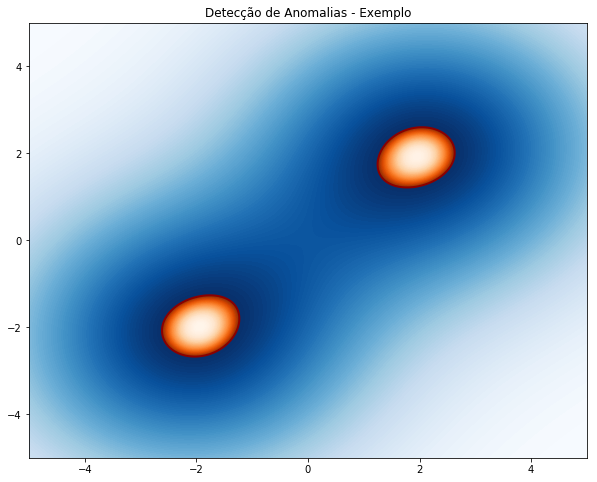

In [26]:
# criando pontos do gráfico
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# calculando a função de decisão do modelo proposto pela máquina em cada um dos pontos
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plotando a função de decisão

fig6, ax6 = plt.subplots(figsize=(10,8))
plt.title("Detecção de Anomalias - Exemplo")

# plotando fronteira de decisão
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# plotando mapa de cores da região dentro da fronteira de decisão
plt.contourf(xx, yy, Z, levels=np.linspace(0, Z.max(),100), cmap=plt.cm.Oranges_r)

# plotando mapa de cores da região fora da fronteira de decisão
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 100), cmap=plt.cm.Blues);

A fronteira está desenhada em vermelho. Segundo o modelo, a região laranja é a que contém os dados regulares e a região azul é a que contém os *outliers*. Quanto mais intensa a cor (laranja ou azul) de um ponto no gráfico, mais perto esse ponto se encontra da fronteira, e, portanto, maiores as chances de erro de classificação.

Por último, plotamos os pontos no gráfico:

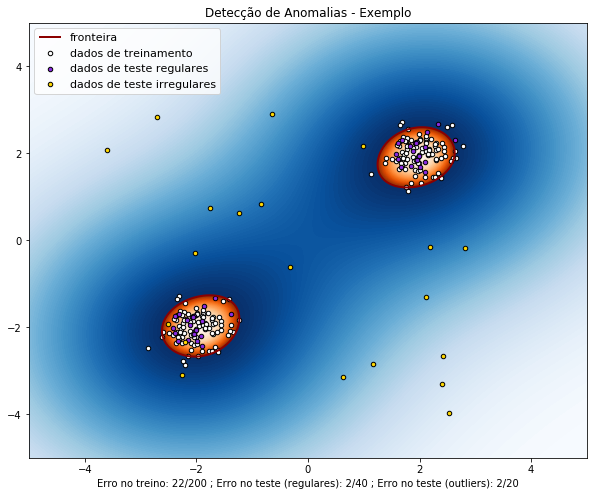

In [27]:
s = 20

b1 = ax6.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = ax6.scatter(X_test_regular[:, 0], X_test_regular[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = ax6.scatter(X_test_outliers[:, 0], X_test_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

ax6.axis('tight')
ax6.set_xlim((-5, 5))
ax6.set_ylim((-5, 5))
ax6.legend([a.collections[0], b1, b2, c],
           ["fronteira", "dados de treinamento",
            "dados de teste regulares", "dados de teste irregulares"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
ax6.set_xlabel(
    "Erro no treino: %d/200 ; Erro no teste (regulares): %d/40 ; "
    "Erro no teste (outliers): %d/20"
    % (n_error_train, n_error_test_regular, n_error_test_outliers))

fig6

## Bibliografia

* [Aurélien Géron - Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - O'Reilly Media](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?ie=UTF8&qid=1524694308&sr=8-1&keywords=hands-on+machine+learning)

* [Ana Carolina Lorena, André C. P. L. F. de Carvaho - Introdução às Máquinas de Vetores Suporte (Support Vector Machines) - Relatórios Técnicos do ICMC - USP](http://conteudo.icmc.usp.br/CMS/Arquivos/arquivos_enviados/BIBLIOTECA_113_RT_192.pdf)

* [Sadanand Singh - Support Vector Machines](https://sadanand-singh.github.io/posts/svmmodels/)

* [Sadanand Singh - Understanding Support Vector Machine via Examples](https://sadanand-singh.github.io/posts/svmpython/)

* [QuantStart Team - Support Vector Machines: A Guide for Beginners](https://www.quantstart.com/articles/Support-Vector-Machines-A-Guide-for-Beginners)

* [Scikit-learn User Guide - Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html#svm)

* [Demnag - Collection Of SVM Libraries By Language](https://www.datasciencecentral.com/profiles/blogs/collection-of-svm-libraries-by-language)

* [Asa Ben-Hur, Jason Weston - A User’s Guide to Support Vector Machines](http://pyml.sourceforge.net/doc/howto.pdf)

* [Abhishek Ghose - Support Vector Machine (SVM) Tutorial](https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93)

* [http://mloss.org/](http://mloss.org/)